# K-Nearest Neighbors (KNN)

Author: Fadoua Ghourabi (fadouaghourabi@gmail.com)

Date: June 27, 2019

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

## Classification

The KNN algorithm is the simplest machine learning algorithm. To classify a new data, KNN searches for the nearest point in the training dataset.

### 1-Nearest Neighbor

<img src="knn_cla1.png">

Image courtesy to _Introduction to Machine Learning with Python, O'Reilly, 2017_

In [211]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=data.target, random_state=66)

In [212]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
print("Train set accuracy: {}".format(clf.score(X_train, y_train)))
print("Test set accuracy: {}".format(clf.score(X_test, y_test)))

Train set accuracy: 1.0
Test set accuracy: 0.9020979020979021


Text(0,0.5,'mean area')

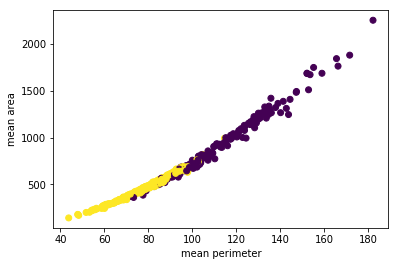

In [214]:
#plt.subplot(231)
#plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
#plt.xlabel(data.feature_names[0])
#plt.ylabel(data.feature_names[1])

#plt.subplot(232)
#plt.scatter(X_train[:,1],X_train[:,2], c=y_train)
#plt.xlabel(data.feature_names[1])
#plt.ylabel(data.feature_names[2])

#plt.subplot(233)
plt.scatter(X_train[:,2],X_train[:,3], c=y_train)
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])

#plt.subplot(234)
#plt.scatter(X_train[:,3],X_train[:,4], c=y_train)
#plt.xlabel(data.feature_names[3])
#plt.ylabel(data.feature_names[4])

#plt.subplot(235)
#plt.scatter(X_train[:,4],X_train[:,5], c=y_train)
#plt.xlabel(data.feature_names[4])
#plt.ylabel(data.feature_names[5])

#plt.subplot(236)
#plt.scatter(X_train[:,5],X_train[:,6], c=y_train)
#plt.xlabel(data.feature_names[5])
#plt.ylabel(data.feature_names[6])

### K>1-Nearest Neighbors

<img src="knn_cla3.png">

Image courtesy to _Introduction to Machine Learning with Python, O'Reilly, 2017_

In [215]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Train set accuracy: {}".format(clf.score(X_train, y_train)))
print("Test set accuracy: {}".format(clf.score(X_test, y_test)))

Train set accuracy: 0.9577464788732394
Test set accuracy: 0.9230769230769231


In [216]:
def plot_KNN(X_train, y_train, X_test, y_test, KNN):
    training_accuracy = []
    test_accuracy = []
    for n in KNN:
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train, y_train))
        test_accuracy.append(clf.score(X_test, y_test))
        
    plt.plot(KNN, training_accuracy, label="training accuracy")
    plt.plot(KNN, test_accuracy, label="test accuray")
    plt.xlabel("n_neighbors")
    plt.ylabel("Accuracy")
    plt.legend()

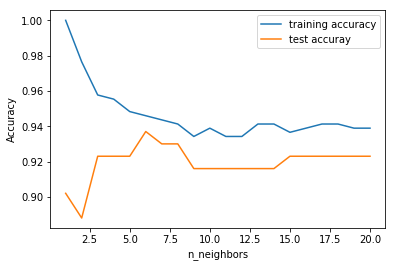

In [217]:
KNN = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plot_KNN(X_train, y_train, X_test, y_test, KNN)

In [218]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
print("Train set accuracy: {}".format(clf.score(X_train, y_train)))
print("Test set accuracy: {}".format(clf.score(X_test, y_test)))

Train set accuracy: 0.9460093896713615
Test set accuracy: 0.9370629370629371


### Distance

To do: what does ‘uniform’ mean? uniform weights. All points in each neighborhood are weighted equally.

In [219]:
clf = KNeighborsClassifier(n_neighbors=6, weights="uniform") # uniform is the default
clf.fit(X_train, y_train)
print("Train set accuracy: {}".format(clf.score(X_train, y_train)))
print("Test set accuracy: {}".format(clf.score(X_test, y_test)))

Train set accuracy: 0.9460093896713615
Test set accuracy: 0.9370629370629371


In [223]:
clf = KNeighborsClassifier(n_neighbors=6, weights="distance")
clf.fit(X_train, y_train)
print("Train set accuracy: {}".format(clf.score(X_train, y_train)))
print("Test set accuracy: {}".format(clf.score(X_test, y_test)))

Train set accuracy: 1.0
Test set accuracy: 0.9300699300699301


We can also define our own distance function. See example below.

In [224]:
def mydist(x1, x2):
    return 0.1 * np.abs(x1[0] - x2[0]) + 0.9*np.abs(x1[1] - x2[1]) 

In [227]:
knn = KNeighborsClassifier(n_neighbors=3, metric=mydist) 
knn.fit(X_train, y_train)
print("Train set accuracy: {}".format(knn.score(X_train, y_train)))
print("Test set accuracy: {}".format(knn.score(X_test, y_test)))

Train set accuracy: 0.9084507042253521
Test set accuracy: 0.8881118881118881


## Regression

The KNN algorithm can be used for regression. 
<img src="knn_reg.png">

Image courtesy to _Introduction to Machine Learning with Python, O'Reilly, 2017_

In [228]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=26)

In [232]:
knn_reg = KNeighborsRegressor(n_neighbors=6)
knn_reg.fit(X_train, y_train)
print("Train set accuracy: {}".format(knn_reg.score(X_train, y_train)))
print("Test set accuracy: {}".format(knn_reg.score(X_test, y_test)))

Train set accuracy: 0.5521568062589955
Test set accuracy: 0.38557777528089554


In [233]:
from sklearn.linear_model import LinearRegression

In [235]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train set accuracy: {}".format(reg.score(X_train, y_train)))
print("Test set accuracy: {}".format(reg.score(X_test, y_test)))

Train set accuracy: 0.5318534159896156
Test set accuracy: 0.4526326869624129


In [236]:
from sklearn.datasets import load_boston

In [238]:
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=26)

In [244]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)
print("Train set accuracy: {}".format(knn_reg.score(X_train, y_train)))
print("Test set accuracy: {}".format(knn_reg.score(X_test, y_test)))

Train set accuracy: 0.7574034329963725
Test set accuracy: 0.504575541615278


In [241]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train set accuracy: {}".format(reg.score(X_train, y_train)))
print("Test set accuracy: {}".format(reg.score(X_test, y_test)))

Train set accuracy: 0.7398592666295977
Test set accuracy: 0.7280271832946508


## Problem: Image classification

**Description:** Image Classification problem is the task of assigning a class to an input image from a fixed set of categories. This is one of the core problems in **computer vision** that, despite its simplicity, has a variety of applications, for instance object recognition in autonomous cars. 

<add tesla video>

**Problem:** For example, in the image below an image classification model takes a single image and assigns probabilities to 2 label, {cat, not cat}. Keep in mind that to a computer an image is represented as one large 3D array of numbers. In this example, the cat image is 64 pixels wide, 64 pixels tall, and has three color channels Red,Green,Blue (or RGB for short). Therefore, the image consists of 64 x 64 x 3 numbers, or a total of 12,288 numbers. Each number is an integer that ranges from 0 (black) to 255 (white). Our task is to large number into a single label, such as “cat”.

<img src="cat.png">

Image courtesy to _Stanford CS class: Convolutional Neural Networks for Visual Recognition_

**Note:** Although KNN can be applied to classification problem, it is not the most efficient algorithm. Deep learning and in particular convolutional networks are the most common approach in image classification. However, for the sake of our current study, we will use KNN. 

### Loading labeled images

Folder datasets contains images that have been already labeled to **cat** and **not cat**. File ``train_catvnoncat.h5`` contains the train dataset and ``test_catvnoncat.h5`` contains the test dataset. Extension ".h5" stands for Hierarchical Data Format, which is used to store and organize a large amount of data. To read ".h5" files in python, you would need to install additional package such as h5py.

In [245]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r") # dataset courtesy to deeplearningai
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [246]:
train_x, train_y, test_x, test_y, classes = load_data()

Let's take a closer look at the images. In the code below, we display an image from the train dataset with ``imshow`` from matplotlib. Function ``imshow`` is powerful! It transforms a matrix that correspond to RGB coding explained above into a picture. ``train_x[index]`` gives an image ``train_y[0,index]`` its label. Change the index below and observe the of value y.

y = 1. It's a cat picture.


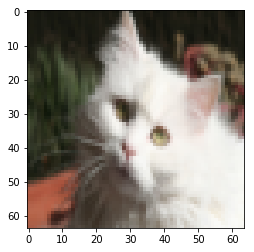

In [252]:
# Example of a picture
index = 102
#print(train_x[index])
plt.imshow(train_x[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [253]:
print("The RGB matrix of the image is {}".format(train_x[index]))

The RGB matrix of the image is [[[ 22  23  17]
  [ 27  27  19]
  [ 24  24  16]
  ...
  [ 24  25  18]
  [ 31  29  22]
  [ 24  25  17]]

 [[ 21  22  16]
  [ 27  27  18]
  [ 24  24  16]
  ...
  [ 23  24  17]
  [ 31  30  22]
  [ 25  25  17]]

 [[ 22  23  16]
  [ 26  27  19]
  [ 24  25  17]
  ...
  [ 23  23  17]
  [ 33  31  22]
  [ 27  27  18]]

 ...

 [[176  97  73]
  [176  95  70]
  [176  96  70]
  ...
  [250 250 246]
  [249 249 243]
  [247 246 238]]

 [[170  95  71]
  [172  96  72]
  [173  96  72]
  ...
  [250 250 247]
  [249 249 244]
  [249 249 245]]

 [[166  91  69]
  [168  93  72]
  [168  97  77]
  ...
  [249 249 246]
  [247 247 242]
  [247 246 241]]]


Next, we explore the dataset. How many observations in the train set? In the test set? What is the size of an image in pixels? And so on...

In [255]:
# Explore your dataset 
m_train = train_x.shape[0]
num_px = train_x.shape[1]
num_px2 = train_x.shape[2]
m_test = test_x.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px2) + ", 3)")
print ("train_x_orig shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


We apply ``KNeighborsClassifier`` on the datasets. It doesn't work! What could be the reason of the error ``ValueError: Found array with dim 4. Estimator expected <= 2.``?

In [256]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(train_x, train_y)
print("Train set accuracy: {}".format(knn.score(train_x, train_y)))
print("Test set accuracy: {}".format(knn.score(test_x, test_y)))

ValueError: Found array with dim 4. Estimator expected <= 2.

### Reshaping the data

An image is converted to a 3D matrix of size 64 x 64 x 3. However, most of machine learning algorithms, including ``KNeighborsClassifier``, accept data of dimension $\leq$ 2. Therefore, we should reshape the coding matrices from 4D matrices of size **(num_observations, width_px, hight_px, 3)** to a 2D matrices of size **(num_observations, width_px $\times$ hight_px $\times$ 3)**.

In [257]:
train_x.shape

(209, 64, 64, 3)

In [258]:
train_x_reshaped = train_x.reshape(m_train, num_px*num_px*3)
train_x_reshaped.shape

(209, 12288)

In [259]:
test_x.shape

(50, 64, 64, 3)

In [260]:
test_x_reshaped = test_x.reshape(m_test, num_px*num_px*3)
test_x_reshaped.shape

(50, 12288)

The target should be a vector with $m$ observations, where $m$ is 209 for the target of train dataset and 50 for the target of test dataset. One way is to transform ``train_y`` and ``test_y`` into a 1D array using function ``ravel``. 

In [261]:
test_y.shape

(1, 50)

In [262]:
test_y_reshaped = np.ravel(test_y)
train_y_reshaped = np.ravel(train_y)

In [263]:
test_y_reshaped.shape

(50,)

### Fitting and prediction

Now that we reshaped the data, we can fit the KNN model. The accuracy score is poor. We might get better score with deep learning algorithms (see demo). 

In [264]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x_reshaped, train_y_reshaped)
print("Train set accuracy: {}".format(knn.score(train_x_reshaped, train_y_reshaped)))
print("Test set accuracy: {}".format(knn.score(test_x_reshaped, test_y_reshaped)))

Train set accuracy: 0.8133971291866029
Test set accuracy: 0.58


You can use your own image and see the output of your model. To do that:
1. Add your image to this Jupyter Notebook's directory, in the "images" folder
2. Change your image's name in the following code
3. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

In [265]:
import scipy

In [266]:
def define_my_image(my_image,dim):
    fname = "images/" + my_image # path to your image
    image = np.array(plt.imread(fname)) # convert your image into 3D martix of RGB codes
    my_image = scipy.misc.imresize(image, size=dim) # resize your image to same size as the images in the dataset.
    
    return my_image

y = 0. It's a non-cat picture.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


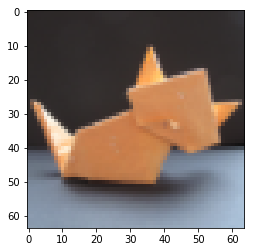

In [267]:
my_image = define_my_image("cat1.jpg",(num_px,num_px))
#my_image = train_x[14]
my_predicted_image = knn.predict(my_image.reshape((1,num_px*num_px*3))) #,np.array(my_label))

plt.imshow(my_image)
print ("y = " + str(my_predicted_image[0]) + ". It's a " + classes[my_predicted_image[0]].decode("utf-8") +  " picture.")